In [47]:
import torch

In [48]:
class Sigmoid(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, bias=True, padding=0)
        self.tanh = torch.nn.Tanh()
        self.conv_2 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, bias=True, padding=0)
        
        self.conv_1.weight.data.fill_(0.5)
        self.conv_2.weight.data.fill_(0.5)
        self.conv_2.bias.data.fill_(0.5)
        for param in self.parameters():
            param.detach_()
    
    def forward(self, x):
        x = self.conv_1(x)
        x = self.tanh(x)
        x = self.conv_2(x)
        
        return x
        
        

In [49]:
a = -10 + 20 * torch.rand([100, 1, 200, 200])

In [56]:
import matplotlib.pyplot as plt

def plot(a, b):
    # Flatten tensors to 1D arrays
    a_flat = a.flatten().detach().numpy()
    b_flat = b.flatten().detach().numpy()

    # Create a scatter plot (sample points to avoid overcrowding)
    num_samples = 10000
    indices = torch.randperm(len(a_flat))[:num_samples]
    plt.figure(figsize=(10, 6))
    plt.scatter(a_flat[indices], b_flat[indices], alpha=0.5, s=5)

    # Add labels and title
    plt.xlabel('Values in tensor a')
    plt.ylabel('Values in tensor b')
    plt.title('Relationship between tensors a and b')

    # Add a grid for better readability
    plt.grid(True, alpha=0.3)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [57]:
sigmoid = Sigmoid()

In [58]:
b = sigmoid(a)

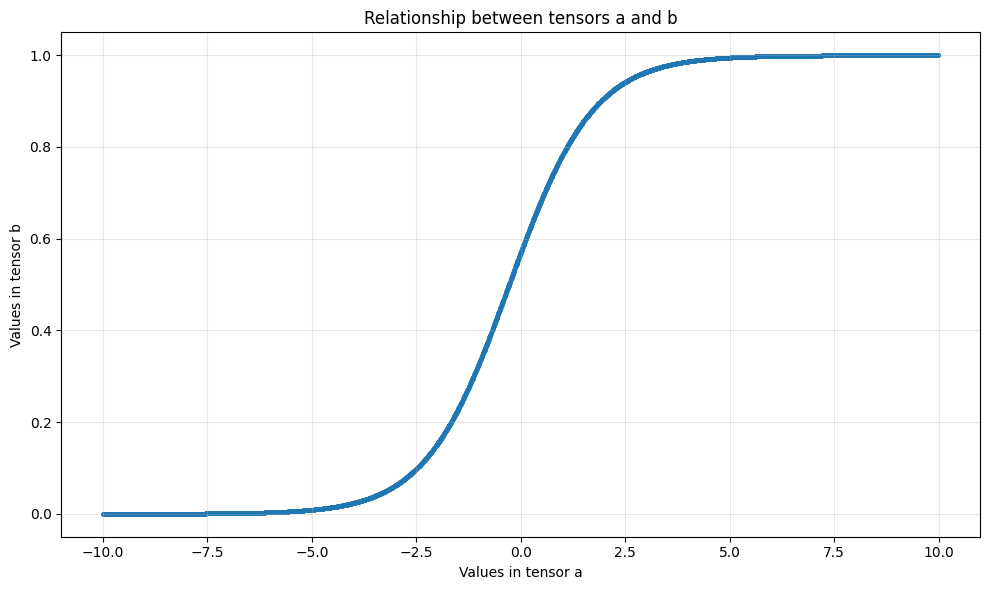

In [59]:
plot(a, b)